<a href="https://colab.research.google.com/github/LeishaR/Song-Popularity-Prediction/blob/main/XGBRegressorSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file path)
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/feature_engineered_spotify_data.csv", encoding='latin1')

# Define your target variable (popularity score) and features
target = 'Popularity Score'  # You can choose any name for the proxy variable
features = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
    'Liveness', 'Valence', 'Tempo',
    'Title Word Count', 'Number of Artists', 'Collaboration',
    'Title Polarity', 'Title Subjectivity',
    'Avg Danceability per Artist', 'Avg Energy per Artist', 'Avg Loudness per Artist',
    'Avg Speechiness per Artist', 'Avg Acousticness per Artist', 'Avg Instrumentalness per Artist',
    'Avg Liveness per Artist', 'Avg Valence per Artist', 'Avg Tempo per Artist',
]

# Create a proxy popularity score based on the features (you can define your own formula)
data['Popularity Score'] = data[features].mean(axis=1)

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an XGBoost regressor (you can choose different hyperparameters)
regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Print the predicted Popularity Scores
print("Predicted Popularity Scores:")
for idx, prediction in enumerate(y_pred):
    print(f"Song {idx + 1}: {prediction:.2f}")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Predicted Popularity Scores:
Song 1: 10.50
Song 2: 10.90
Song 3: 11.45
Song 4: 9.45
Song 5: 7.44
Song 6: 11.11
Song 7: 8.98
Song 8: 12.25
Song 9: 10.10
Song 10: 9.91
Song 11: 12.92
Song 12: 10.09
Song 13: 9.11
Song 14: 7.68
Song 15: 10.83
Song 16: 8.86
Song 17: 9.90
Song 18: 12.79
Song 19: 11.19
Song 20: 9.75
Song 21: 11.09
Song 22: 7.99
Song 23: 9.28
Song 24: 9.20
Song 25: 10.87
Song 26: 15.33
Song 27: 13.44
Song 28: 11.81
Song 29: 14.69
Song 30: 12.06
Song 31: 11.67
Song 32: 12.41
Song 33: 12.69
Song 34: 9.13
Song 35: 12.28
Song 36: 12.28
Song 37: 9.12
Song 38: 11.90
Song 39: 10.88
Song 40: 8.21
Song 41: 8.18
Song 42: 8.00
Song 43: 16.57
Song 44: 12.56
Song 45: 9.51
Song 46: 8.65
Song 47: 9.91
Song 48: 5.72
Song 49: 17.66
Song 50: 10.13
Song 51: 12.97
Song 52: 10.27
Song 53: 10.28
Song 54: 11.41
Song 55: 6.85
Song 56: 8.47
Song 57: 10.86
Song 58: 10.89
So

In [ ]:
# Rank songs based on predicted Popularity Scores (descending order)
ranked_songs = data[['Name', 'Artists', 'Album', 'Release Date', 'Popularity Score']].copy()
ranked_songs['Rank'] = ranked_songs['Popularity Score'].rank(ascending=False, method='min')

# Sort the ranked songs by Rank
ranked_songs = ranked_songs.sort_values(by='Rank')

# Print the ranked songs
print("\nRanked Songs:")
print(ranked_songs[['Name', 'Artists', 'Popularity Score', 'Rank']])


Ranked Songs:
                                                  Name  \
419                                   Similar Features   
778                                    FourFiveSeconds   
721                              Islands In The Stream   
477  Weapon Of Choice (feat. Bootsy Collins) - Rema...   
30                    Single Ladies (Put a Ring on It)   
..                                                 ...   
517                                              Hello   
960                     The Weight (with Jimmy Barnes)   
643                                   We Are The World   
97                                      Sweet Caroline   
875                               Don't Worry Be Happy   

                               Artists  Popularity Score   Rank  
419                  Melissa Etheridge         17.843704    1.0  
778  Rihanna,Kanye West,Paul McCartney         17.822017    2.0  
721          Kenny Rogers,Dolly Parton         17.783400    3.0  
477         Fatboy Slim,

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20
Mean Absolute Error (MAE): 0.15
R-squared (R2): 0.99


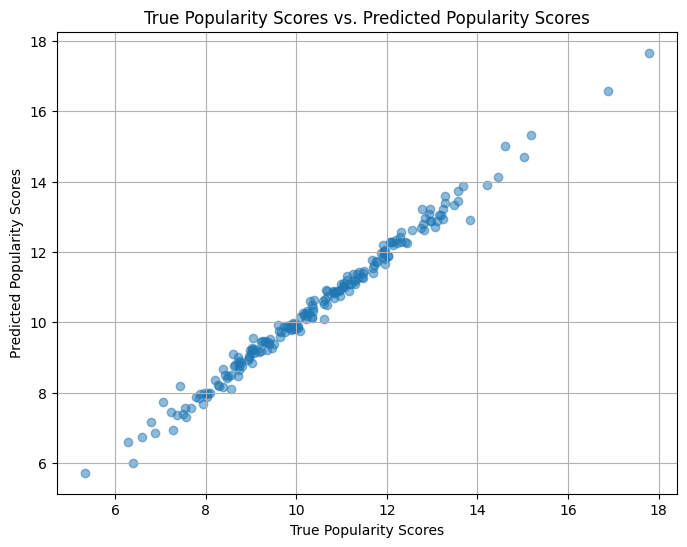

In [ ]:
# Visualize the relationship between true popularity scores and predicted popularity scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True Popularity Scores vs. Predicted Popularity Scores')
plt.xlabel('True Popularity Scores')
plt.ylabel('Predicted Popularity Scores')
plt.grid(True)
plt.show()


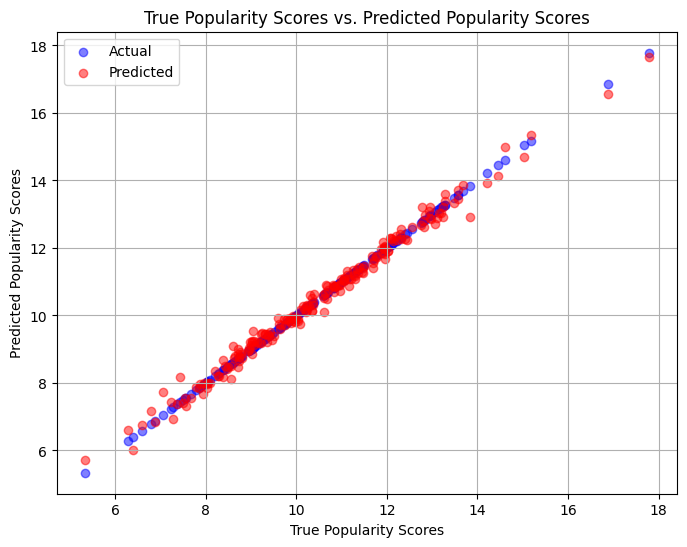

In [ ]:
# Create a scatter plot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))

# Plot actual values (y_test) in blue
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)

# Plot predicted values (y_pred) in red
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)

plt.title('True Popularity Scores vs. Predicted Popularity Scores')
plt.xlabel('True Popularity Scores')
plt.ylabel('Predicted Popularity Scores')
plt.grid(True)

# Add a legend to differentiate between actual and predicted values
plt.legend()

plt.show()

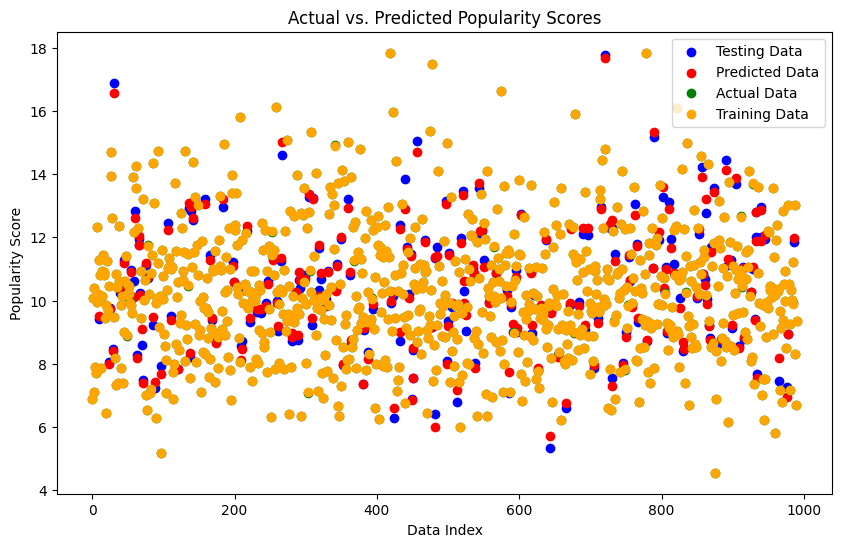

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plotting the actual data for testing set
plt.scatter(X_test.index, y_test, color='blue', label='Testing Data')

# Plotting the predicted data for testing set
plt.scatter(X_test.index, y_pred, color='red', label='Predicted Data')

# Plotting the actual data for training set
plt.scatter(X_train.index, y_train, color='green', label='Actual Data')

# Plotting the predicted data for training set
plt.scatter(X_train.index, regressor.predict(X_train), color='orange', label='Training Data')

plt.title('Actual vs. Predicted Popularity Scores')
plt.xlabel('Data Index')
plt.ylabel('Popularity Score')
plt.legend()
plt.show()

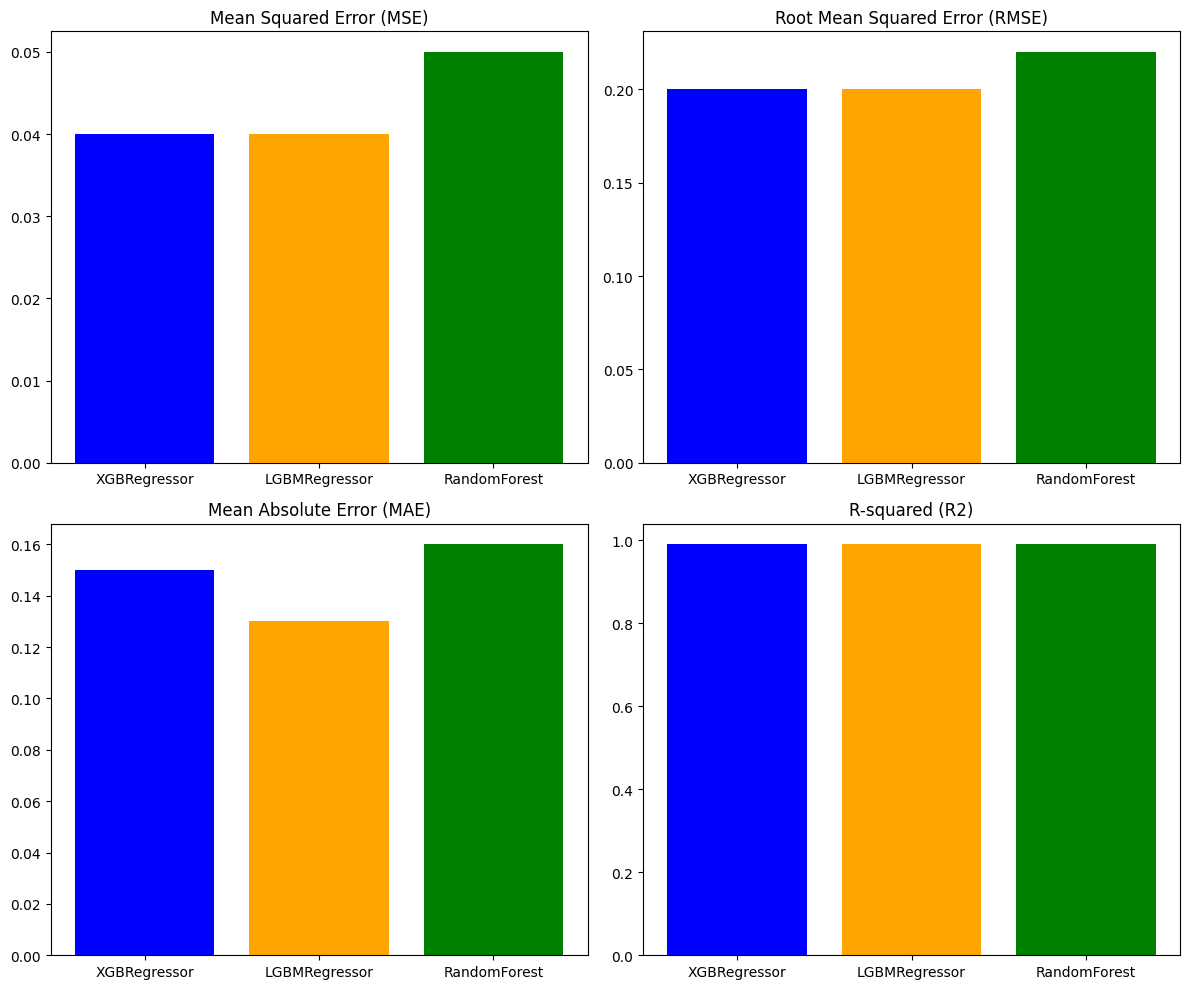

In [ ]:


# Evaluation metrics for three models
models = ['XGBRegressor', 'LGBMRegressor', 'RandomForest']
mse_values = [0.04, 0.04, 0.05]
rmse_values = [0.20, 0.20, 0.22]
mae_values = [0.15, 0.13, 0.16]
r2_values = [0.99, 0.99, 0.99]

# Plotting the metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Mean Squared Error (MSE)
axes[0, 0].bar(models, mse_values, color=['blue', 'orange', 'green'])
axes[0, 0].set_title('Mean Squared Error (MSE)')

# Root Mean Squared Error (RMSE)
axes[0, 1].bar(models, rmse_values, color=['blue', 'orange', 'green'])
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')

# Mean Absolute Error (MAE)
axes[1, 0].bar(models, mae_values, color=['blue', 'orange', 'green'])
axes[1, 0].set_title('Mean Absolute Error (MAE)')

# R-squared (R2)
axes[1, 1].bar(models, r2_values, color=['blue', 'orange', 'green'])
axes[1, 1].set_title('R-squared (R2)')

plt.tight_layout()
plt.show()
